In [1]:
import numpy as np
import pandas as pd

In [8]:
crop = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\crop\\data\\Crop_recommendation.csv")






In [9]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684,banana
1693,114,94,53,26.335449,76.853201,6.190757,118.685826,banana
1694,110,78,50,25.937302,78.898644,5.915569,98.217475,banana
1695,94,70,48,25.136865,84.883944,6.195152,91.464425,banana


In [10]:
crop.shape

(1697, 8)

In [11]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
crop.info

<bound method DataFrame.info of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
1692  117  86  48    28.695620  82.541958  6.225225  116.161684  banana
1693  114  94  53    26.335449  76.853201  6.190757  118.685826  banana
1694  110  78  50    25.937302  78.898644  5.915569   98.217475  banana
1695   94  70  48    25.136865  84.883944  6.195152   91.464425  banana
1696   80  71  47    27.505277  80.797840  6.156373  105.077699  banana

[1697 rows x 8 columns]>

In [13]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [14]:
x=crop[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]


In [15]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
1692,117,86,48,28.695620,82.541958,6.225225,116.161684
1693,114,94,53,26.335449,76.853201,6.190757,118.685826
1694,110,78,50,25.937302,78.898644,5.915569,98.217475
1695,94,70,48,25.136865,84.883944,6.195152,91.464425


In [16]:
y=crop[["label"]]

In [52]:
y

,label
0,rice
1,rice
2,rice
3,rice
4,rice
...,...
1692,banana
1693,banana
1694,banana
1695,banana


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.1)

In [18]:
x_train.shape

(1527, 7)

In [19]:
x_test.shape

(170, 7)

In [20]:
y_train.shape

(1527, 1)

In [57]:
y_test.shape

(170, 1)

In [21]:
from sklearn.metrics import accuracy_score
from sklearn import svm
clf=svm.SVC()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.9882352941176471


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
from sklearn.metrics import accuracy_score
from sklearn import tree
dt= tree.DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

0.9941176470588236


In [23]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=accuracy_score(y_test,y_pred)
print(score)

1.0


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [24]:
prediction=rf.predict([[74,35,40,26.491096,80.158363,6.980401,242.864034]])

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [25]:
print(prediction)

['rice']


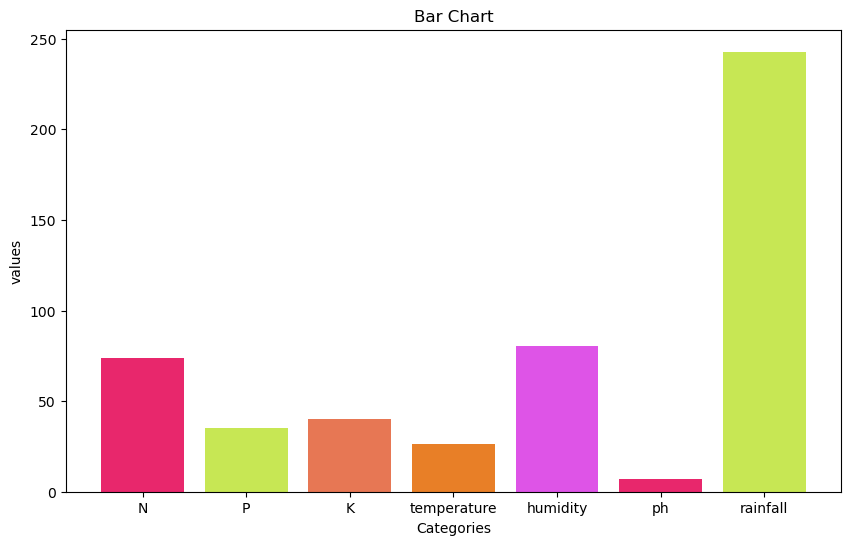

In [26]:
import matplotlib.pyplot as plt
categories = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
values = [74,35,40,26.491096,80.158363,6.980401,242.864034]
colors=["#e8276c","#c7e754","#e77754","#e87f27","#de54e7"]
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.xlabel('Categories')
plt.ylabel('values')
plt.title('Bar Chart')
plt.show()



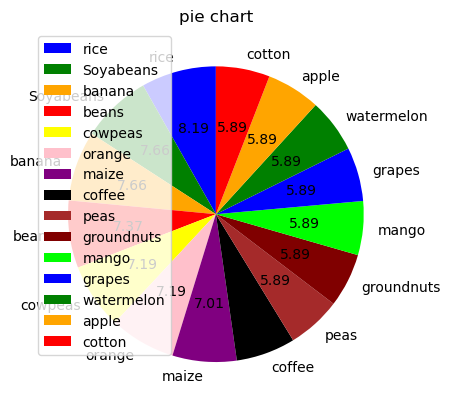

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
sex_counts= crop['label'].value_counts()
labels = sex_counts.index.tolist()
values = sex_counts.values
plt.pie(x=values,
        labels=labels,
        startangle=90,
        colors=['blue','green','orange','red','yellow','pink','purple','black','brown','maroon','lime'],
        autopct='%.2f')
plt.legend()
plt.title("pie chart")
plt.show()

In [31]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 2: Read your dataset
crop = pd.read_csv("data/Crop_recommendation.csv")  # Correct relative path

# Step 3: Prepare data
X = crop.drop('label', axis=1)
y = crop['label']

# Step 4: Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 6: Optional accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))




Accuracy: 1.0


In [32]:
import pickle

with open("model/agriculture.pkl", "wb") as f:
    pickle.dump(model, f)
